In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set_style("dark")
sns.set(color_codes=True)
%matplotlib inline

In [2]:
#Import the provided csv file and name it as df
df = pd.read_csv("D:\\Upgrad-Rituj\\Group case study module 2-EDA\\loan.csv")

In [3]:
#Glimpse of data.There are 39717 rows and 11 columns to begin with.
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(39717, 111)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


Find out the fraction of missing values.There are many columns with 100% null values. All of such columns can be dropped.Now we have about57 columns remaining


In [6]:
round(100*(df.isnull().sum()/len(df)), 2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [7]:
df.dropna(axis=1,how="all",inplace=True)

In [8]:
df.shape

(39717, 57)

In [9]:
#Find out the fraction of missing values
round(100*(df.isnull().sum()/len(df)), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

Dropping all the columns that have more than 5% of null values and are not relevant for analysis after reviwing the metadata.Now we have 52 columns remaining.

In [10]:

df = df.drop(["next_pymnt_d","mths_since_last_record","mths_since_last_delinq","emp_title","desc"], axis=1)

In [11]:
round(100*(df.isnull().sum()/len(df)), 2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec                       0.00
revol_bal           

In [12]:
df.shape

(39717, 52)

There  are many columns that have unique values like 0,1,INDIVIDUAL etc. They woun't be providing any useful information for analysis and can be dropped.After doing this we have 43 columns remaining.

In [13]:
df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                         40
pub_rec                     

In [14]:
df = df.drop(["tax_liens","delinq_amnt","chargeoff_within_12_mths","acc_now_delinq","application_type","policy_code","collections_12_mths_ex_med","initial_list_status","pymnt_plan"],axis=1)

In [15]:
df.shape

(39717, 43)

Grouping the columns to check if there are any other columns that can be removed.Also we would be changing the datatype wherever to suit our analysis.
In the first grouping, "months" removed from term column and "%" sign removed from int_rate column.



In [16]:
df.iloc[:5,0:10]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5


In [17]:
term_temp = df['term'].apply(lambda x: x.split())
term_temp

0        [36, months]
1        [60, months]
2        [36, months]
3        [36, months]
4        [60, months]
5        [36, months]
6        [60, months]
7        [36, months]
8        [60, months]
9        [60, months]
10       [60, months]
11       [36, months]
12       [36, months]
13       [36, months]
14       [36, months]
15       [36, months]
16       [36, months]
17       [36, months]
18       [36, months]
19       [36, months]
20       [60, months]
21       [36, months]
22       [36, months]
23       [36, months]
24       [36, months]
25       [36, months]
26       [36, months]
27       [60, months]
28       [36, months]
29       [36, months]
             ...     
39687    [36, months]
39688    [36, months]
39689    [36, months]
39690    [36, months]
39691    [36, months]
39692    [36, months]
39693    [36, months]
39694    [36, months]
39695    [36, months]
39696    [36, months]
39697    [36, months]
39698    [36, months]
39699    [36, months]
39700    [36, months]
39701    [

In [18]:
df['term']=term_temp.apply(lambda x: x[0])

In [19]:
int_rate_temp = df['int_rate'].apply(lambda x: x.split("%"))
df['int_rate']=int_rate_temp.apply(lambda x: x[0])

In [20]:
df.iloc[:5,0:10]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5


In [21]:
df.iloc[:5,10:20]

,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code
0,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx
1,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx
2,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx
3,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx
4,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx


In [22]:
df['emp_length']=df['emp_length'].apply(lambda x: str(x))
df['emp_length']=df['emp_length'].apply(lambda x: x.replace('<1','0'))
df['emp_length']=df['emp_length'].apply(lambda x: x.replace('< 1','0'))
df['emp_length']=df['emp_length'].apply(lambda x: x.replace('10+','10'))
df['emp_length']=df['emp_length'].apply(lambda x: x.replace('n/a','0'))
df['emp_length']=df['emp_length'].apply(lambda x: x.replace('nan','0'))
df.emp_length.nunique()

12

In [23]:
years_of_srvc=df['emp_length'].apply(lambda x: x.split())
years_of_srvc

0        [10, years]
1          [0, year]
2        [10, years]
3        [10, years]
4          [1, year]
5         [3, years]
6         [8, years]
7         [9, years]
8         [4, years]
9          [0, year]
10        [5, years]
11       [10, years]
12         [0, year]
13        [3, years]
14        [3, years]
15         [0, year]
16        [4, years]
17       [10, years]
18         [1, year]
19        [6, years]
20        [3, years]
21       [10, years]
22       [10, years]
23        [5, years]
24         [1, year]
25        [2, years]
26        [9, years]
27        [2, years]
28       [10, years]
29         [0, year]
            ...     
39687     [9, years]
39688     [6, years]
39689      [0, year]
39690     [3, years]
39691      [1, year]
39692      [1, year]
39693      [0, year]
39694     [8, years]
39695     [7, years]
39696     [2, years]
39697      [0, year]
39698      [1, year]
39699     [4, years]
39700      [0, year]
39701     [7, years]
39702      [1, year]
39703     [2,

In [24]:
df['emp_length']=years_of_srvc.apply(lambda x: x[0])

In [25]:
df.title.nunique()

19615

In [26]:
df.purpose.nunique()

14

In [27]:
df = df.drop(["url","title"],axis=1)

In [28]:
df["issue_d"] = pd.to_datetime(df.issue_d,format="%b-%y")

In the third grouping, earliest_cr_line converted to datetime.

In [29]:
df.iloc[:5,20:30]

,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv
0,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00
1,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00
2,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00
3,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00
4,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06


In [30]:
df["earliest_cr_line"] = pd.to_datetime(df.earliest_cr_line,format="%b-%y")

In the fourth grouping last_pymnt_d & last_credit_pull_d converted to datetime

In [31]:
df.iloc[:5,30:]

,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [32]:
df["last_pymnt_d"] = pd.to_datetime(df.last_pymnt_d,format="%b-%y")

In [33]:
df["last_credit_pull_d"] = pd.to_datetime(df.last_credit_pull_d,format="%b-%y")

In [34]:
df.iloc[:5,30:]

,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0
1,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
2,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0
3,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
4,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0


After this operation we have 41 columns remaining. 70 columns have been dropped. There are few columns that have less than 2% of null values.We are not imputing them as those columns won't make big difference to the analysis.'

In [35]:
df.shape

(39717, 41)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
id                         39717 non-null int64
member_id                  39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null object
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_length                 39717 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null datetime64[ns]
loan_status                39717 non-null object
purpose                    39717 non-null object
zip_code                   39717 non-null object
ad

In [37]:
round(100*(df.isnull().sum()/len(df)), 2)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 0.00
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
out_prncp                  0.00
out_prncp_inv              0.00
total_pymnt                0.00
total_py

In [38]:
df.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.0000,2015-01-01,171.62,2016-05-01,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.1100,2013-04-01,119.66,2013-09-01,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.0000,2014-06-01,649.91,2016-05-01,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.0000,2015-01-01,357.48,2016-04-01,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.0000,2016-05-01,67.79,2016-05-01,0.0
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.0000,2015-01-01,161.03,2016-01-01,0.0
6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,C,C5,...,10110.84,6985.61,3125.23,0.00,0.00,0.0000,2016-05-01,1313.76,2016-05-01,0.0
7,1072053,1288686,3000,3000,3000.0,36,18.64,109.43,E,E1,...,3939.14,3000.00,939.14,0.00,0.00,0.0000,2015-01-01,111.34,2014-12-01,0.0
8,1071795,1306957,5600,5600,5600.0,60,21.28,152.39,F,F2,...,646.02,162.02,294.94,0.00,189.06,2.0900,2012-04-01,152.39,2012-08-01,0.0
9,1071570,1306721,5375,5375,5350.0,60,12.69,121.45,B,B5,...,1469.34,673.48,533.42,0.00,269.29,2.5200,2012-11-01,121.45,2013-03-01,0.0


In [39]:
df.iloc[:,0:2].nunique()

id           39717
member_id    39717
dtype: int64

In [40]:
temp1 = df.groupby("loan_status")["id"].count().reset_index()
temp1["Percentage"] = 100 * temp1["id"]/temp1["id"].sum()
temp1

,loan_status,id,Percentage
0,Charged Off,5627,14.167737
1,Current,1140,2.870307
2,Fully Paid,32950,82.961956


In [41]:
temp2 = df.groupby("term")["id"].count().reset_index()
temp2["Percentage"] = 100 * temp2["id"]/temp2["id"].sum()
temp2

,term,id,Percentage
0,36,29096,73.258302
1,60,10621,26.741698


In [42]:
temp3 = df.groupby("grade")["id"].count().reset_index()
temp3["Percentage"] = 100 * temp3["id"]/temp3["id"].sum()
temp3


,grade,id,Percentage
0,A,10085,25.392149
1,B,12020,30.264119
2,C,8098,20.389254
3,D,5307,13.362036
4,E,2842,7.155626
5,F,1049,2.641186
6,G,316,0.795629


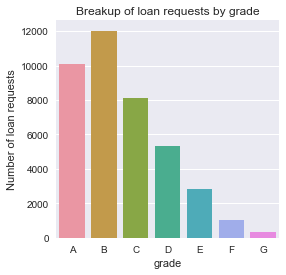

In [43]:
sequence1 = ["A","B","C","D","E", "F", "G"]
plt.figure(figsize=(4, 4))
sns.countplot(x="grade", data=df, order=sequence1)
plt.title('Breakup of loan requests by grade')
plt.ylabel('Number of loan requests')
plt.show()

In [44]:
temp8 = df.groupby("grade")["id"].count().reset_index()
temp8["Percentage"] = 100 * temp8["id"]/temp8["id"].sum()
temp8

,grade,id,Percentage
0,A,10085,25.392149
1,B,12020,30.264119
2,C,8098,20.389254
3,D,5307,13.362036
4,E,2842,7.155626
5,F,1049,2.641186
6,G,316,0.795629


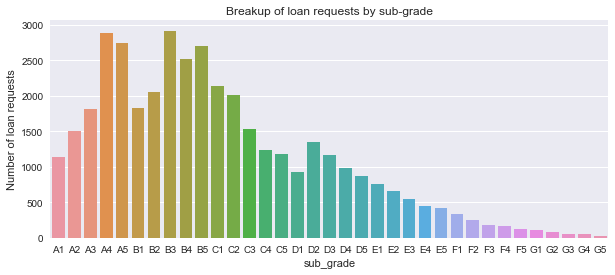

In [45]:
sequence2=["A1","A2","A3","A4","A5","B1","B2","B3","B4","B5","C1","C2","C3","C4","C5","D1","D2","D3","D4","D5","E1","E2","E3","E4","E5","F1","F2","F3","F4","F5","G1","G2","G3","G4","G5"]
plt.figure(figsize=(10, 4))
sns.countplot(x="sub_grade", data=df,order=sequence2)
plt.title('Breakup of loan requests by sub-grade')
plt.ylabel('Number of loan requests')
plt.show()

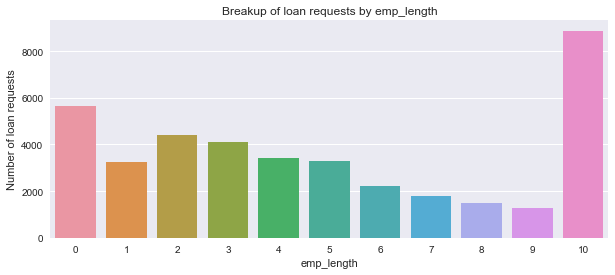

In [46]:
sequence3 = ["0","1","2","3","4","5","6","7","8","9","10"]
plt.figure(figsize=(10, 4))
sns.countplot(x="emp_length", data=df, order=sequence3)
plt.title('Breakup of loan requests by emp_length')
plt.ylabel('Number of loan requests')
plt.show()

In [47]:
temp4 = df.groupby("emp_length")["id"].count().reset_index()
temp4["Percentage"] = 100 * temp4["id"]/temp4["id"].sum()
temp4

,emp_length,id,Percentage
0,0,5658,14.245789
1,1,3240,8.157716
2,10,8879,22.355666
3,2,4388,11.048166
4,3,4095,10.310446
5,4,3436,8.651207
6,5,3282,8.263464
7,6,2229,5.612206
8,7,1773,4.464083
9,8,1479,3.723846


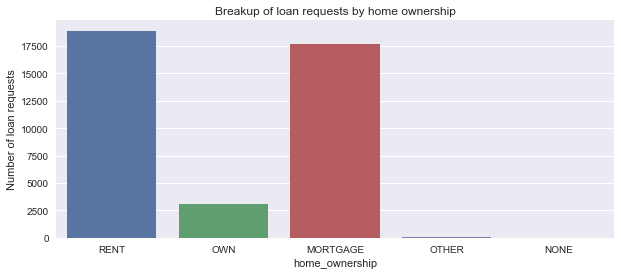

In [48]:
plt.figure(figsize=(10, 4))
sns.countplot(x="home_ownership", data=df)
plt.title('Breakup of loan requests by home ownership')
plt.ylabel('Number of loan requests')
plt.show()

In [49]:
temp5 = df.groupby("home_ownership")["id"].count().reset_index()
temp5["Percentage"] = 100 * temp5["id"]/temp5["id"].sum()
temp5

,home_ownership,id,Percentage
0,MORTGAGE,17659,44.462069
1,NONE,3,0.007553
2,OTHER,98,0.246746
3,OWN,3058,7.699474
4,RENT,18899,47.584158


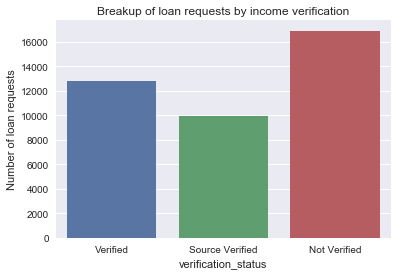

In [50]:
plt.figure(figsize=(6, 4))
sns.countplot(x="verification_status", data=df)
plt.title('Breakup of loan requests by income verification')
plt.ylabel('Number of loan requests')
plt.show()

In [51]:
temp6 = df.groupby("verification_status")["id"].count().reset_index()
temp6["Percentage"] = 100 * temp6["id"]/temp6["id"].sum()
temp6

,verification_status,id,Percentage
0,Not Verified,16921,42.603923
1,Source Verified,9987,25.145404
2,Verified,12809,32.250674


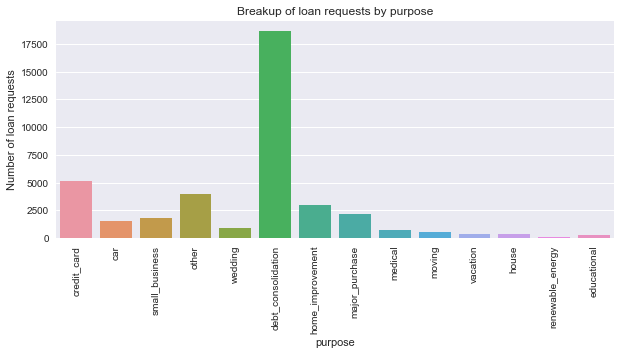

In [52]:
plt.figure(figsize=(10, 4))
sns.countplot(x="purpose", data=df)
plt.title('Breakup of loan requests by purpose')
plt.ylabel('Number of loan requests')
plt.xticks(rotation=90)
plt.show()

In [53]:
temp7 = df.groupby("purpose")["id"].count().reset_index()
temp7["Percentage"] = 100 * temp7["id"]/temp7["id"].sum()
temp7

,purpose,id,Percentage
0,car,1549,3.900093
1,credit_card,5130,12.916383
2,debt_consolidation,18641,46.934562
3,educational,325,0.818289
4,home_improvement,2976,7.493013
5,house,381,0.959287
6,major_purchase,2187,5.506458
7,medical,693,1.744845
8,moving,583,1.467885
9,other,3993,10.053629


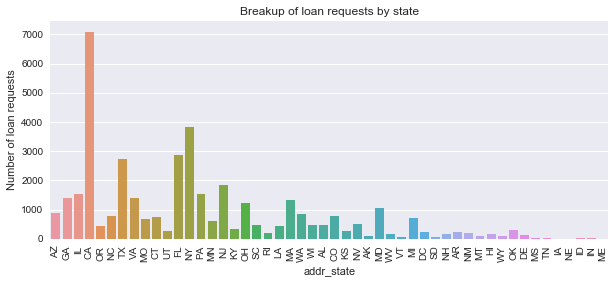

In [54]:
plt.figure(figsize=(10, 4))
sns.countplot(x="addr_state", data=df)
plt.title('Breakup of loan requests by state')
plt.ylabel('Number of loan requests')
plt.xticks(rotation=90)
plt.show()

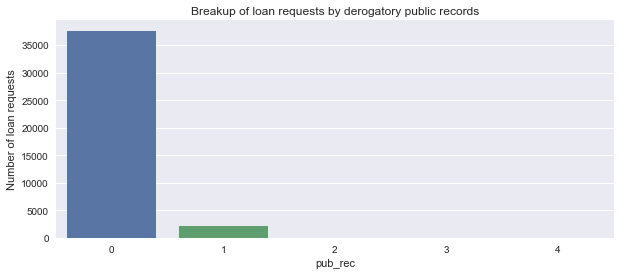

In [55]:
plt.figure(figsize=(10, 4))
sns.countplot(x="pub_rec", data=df)
plt.title('Breakup of loan requests by derogatory public records')
plt.ylabel('Number of loan requests')
plt.show()

In [56]:
temp8 = df.groupby("pub_rec")["id"].count().reset_index()
temp8["Percentage"] = 100 * temp8["id"]/temp8["id"].sum()
temp8

,pub_rec,id,Percentage
0,0,37601,94.672307
1,1,2056,5.176625
2,2,51,0.128408
3,3,7,0.017625
4,4,2,0.005036


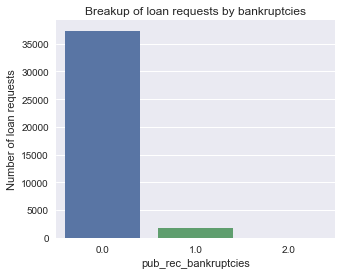

In [57]:
plt.figure(figsize=(5, 4))
sns.countplot(x="pub_rec_bankruptcies", data=df)
plt.title('Breakup of loan requests by bankruptcies')
plt.ylabel('Number of loan requests')
plt.show()

In [58]:
temp9 = df.groupby("pub_rec_bankruptcies")["id"].count().reset_index()
temp9["Percentage"] = 100 * temp9["id"]/temp9["id"].sum()
temp9

,pub_rec_bankruptcies,id,Percentage
0,0.0,37339,95.691953
1,1.0,1674,4.290108
2,2.0,7,0.017940


In [59]:
df["annual_inc"].max()

6000000.0

In [60]:
df["annual_inc"].min()

4000.0

In [61]:
df["annual_inc"].mean()

68968.92637711817

In [62]:
df["annual_inc"].median()

59000.0

Text(0.5,1,'Distribution of annual income')

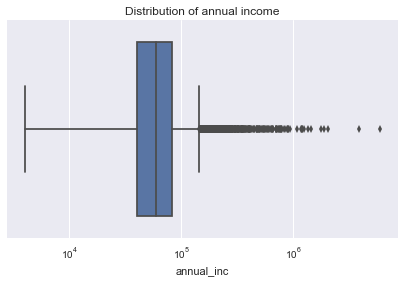

In [63]:
f, ax = plt.subplots(figsize=(7, 4))
ax.set_xscale("log")
sns.boxplot(df["annual_inc"])
plt.title('Distribution of annual income')




In [64]:
q3 = df["annual_inc"].quantile(0.99)
q3

234999.36

In [65]:
df[df.annual_inc > q3]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
392,1064548,1298574,5000,5000,5000.000000,36,6.62,153.52,A,A2,...,5526.66,5000.00,526.66,0.000000,0.00,0.0000,2015-01-01,166.04,2014-12-01,0.0
717,1060831,1292796,28000,28000,28000.000000,36,15.96,983.85,C,C5,...,34735.37,28000.00,6735.37,0.000000,0.00,0.0000,2014-02-01,10164.77,2014-03-01,0.0
836,1059319,1291122,35000,22875,22875.000000,60,19.03,593.77,E,E2,...,19075.97,6337.11,7318.78,0.000000,5420.08,921.4136,2013-12-01,31.28,2016-05-01,0.0
1210,1054185,1285812,12000,12000,12000.000000,36,6.03,365.23,A,A1,...,13148.14,12000.00,1148.14,0.000000,0.00,0.0000,2014-12-01,369.48,2014-12-01,0.0
1348,1049941,1281351,35000,35000,35000.000000,36,7.90,1095.16,A,A4,...,39418.80,35000.00,4418.80,0.000000,0.00,0.0000,2014-11-01,2188.94,2014-11-01,0.0
1463,1050329,1281759,30000,30000,30000.000000,60,20.30,799.84,E,E5,...,5780.42,1828.29,2966.49,0.000000,985.64,10.0400,2012-07-01,799.84,2012-11-01,0.0
1617,1048214,1279331,10000,10000,10000.000000,36,15.96,351.38,C,C5,...,12649.36,10000.00,2649.36,0.000000,0.00,0.0000,2014-12-01,373.09,2016-05-01,0.0
1620,1048026,1279160,7800,7800,7800.000000,36,13.49,264.66,C,C1,...,9566.42,7800.00,1736.42,30.000000,0.00,0.0000,2015-01-01,24.91,2016-05-01,0.0
1788,1043030,1273525,25000,25000,24925.000000,36,6.62,767.60,A,A2,...,26342.66,25000.00,1421.92,0.000000,0.00,0.0000,2012-12-01,17988.23,2012-12-01,0.0
1805,1043408,1273730,35000,35000,35000.000000,36,10.65,1140.07,B,B2,...,41042.21,35000.00,6042.21,0.000000,0.00,0.0000,2014-12-01,1160.08,2014-12-01,0.0


In [66]:
df.shape

(39717, 41)

In [67]:
df = df[df.annual_inc < q3]

In [68]:
df.shape

(39319, 41)

For outlier analysis,Interest rate(int_rate) boxplot is drawn.We ddecided that values beyond 22.5 can be excluded from the analysis for outlier treatment.

Text(0.5,1,'Distribution of interest rate')

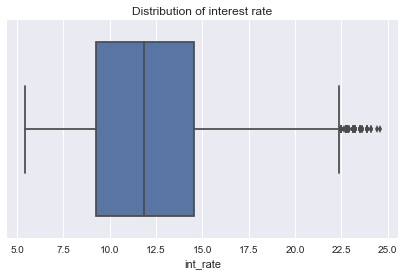

In [69]:
df.int_rate = df.int_rate.astype(float)
f, ax = plt.subplots(figsize=(7, 4))
#ax.set_xscale("log")
sns.boxplot(df["int_rate"])
plt.title('Distribution of interest rate')

In [70]:
df = df[df.int_rate < 22.5]

In [71]:
df.shape

(39242, 41)

The dataset has many columns that are highly correlated.We can only keep 1 of the coorelated values and remove others as they won't be adding any value to our analysis.After this activity we are left with 34 columns.

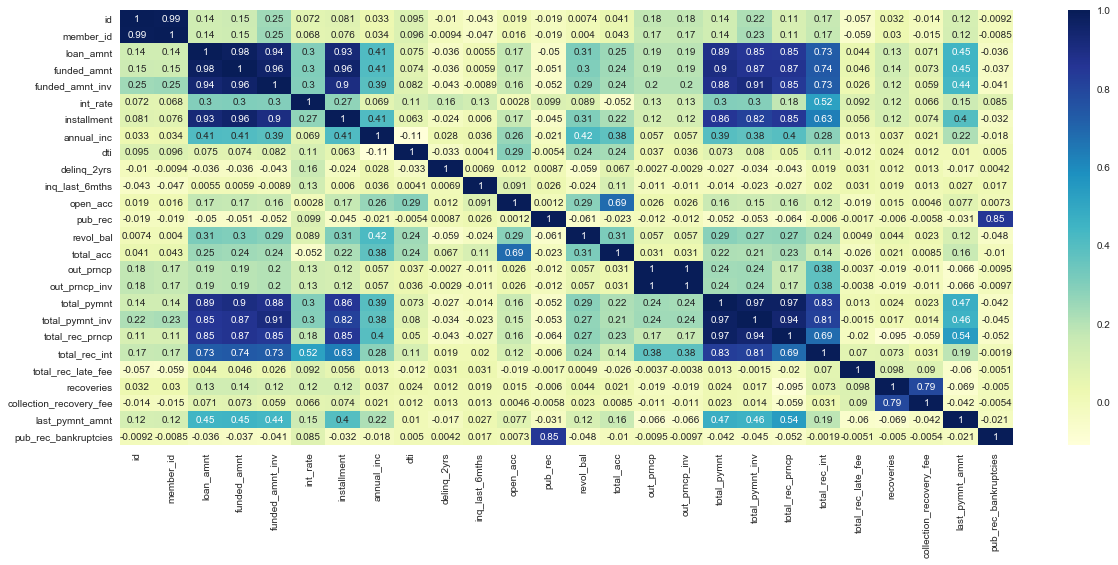

In [72]:
cor = df.corr()

# figure size
plt.figure(figsize=(20,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [73]:
df = df.drop(["id","funded_amnt","funded_amnt_inv","installment","total_pymnt_inv"], axis=1)
df = df.drop(["total_rec_prncp", "out_prncp_inv"], axis=1)


In [74]:
df.shape

(39242, 34)

Removing the loan requests that have loan status as current from the dataset because such requests can become fully paid or defaulters in future.This would result in clear graphs.

In [75]:
df_current = df.loc[df.loan_status == "Current"]
df = df.loc[df.loan_status != "Current"]

Analysing different variables with repect to loan status.Selected the variables after going through the metadata and discussing on the potential variables.

In [76]:
df_loan=df.groupby(['home_ownership','loan_status']).count()['member_id'].unstack()
df_loan=df_loan.fillna(0)
df_loan

loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,2291.0,14432.0
NONE,0.0,3.0
OTHER,18.0,78.0
OWN,439.0,2506.0
RENT,2807.0,15555.0


In [77]:
sum=df_loan['Charged Off']+df_loan['Fully Paid']
df_loan['Charged Off']=df_loan['Charged Off']*100/sum
df_loan['Fully Paid']=df_loan['Fully Paid']*100/sum
df_loan

loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,13.699695,86.300305
NONE,0.000000,100.000000
OTHER,18.750000,81.250000
OWN,14.906621,85.093379
RENT,15.287006,84.712994


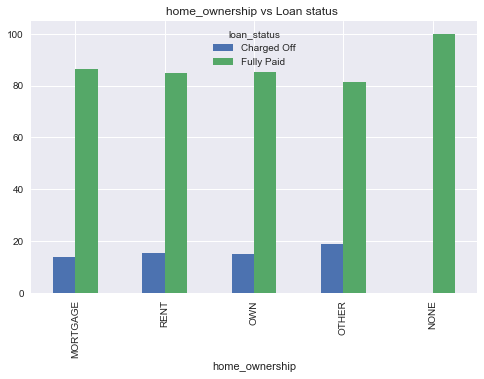

In [78]:
fig, ax = plt.subplots(figsize=(8,5))
plt.title('home_ownership vs Loan status ')
df_loan.reindex(["MORTGAGE","RENT","OWN","OTHER","NONE"]).plot(ax=ax,kind='bar')

There is no significant difference on the percentage of 'loan status' as Charged Off on the home_ownership.Although it is seen that if home_ownership is "OTHER" then % of defaulters is significantly more.There is difference of  1% between other categories and impact can be understood better if "OTHER" is defined.



In [79]:
df_emp=df.groupby(['emp_length','loan_status']).count()['member_id'].unstack()
sum_emp=df_emp['Charged Off']+df_emp['Fully Paid']
df_emp['Charged Off']=df_emp['Charged Off']*100/sum_emp
df_emp['Fully Paid']=df_emp['Fully Paid']*100/sum_emp
df_emp

loan_status,Charged Off,Fully Paid
emp_length,,
0,15.618182,84.381818
1,14.404079,85.595921
10,15.683453,84.316547
2,13.201320,86.798680
3,13.691377,86.308623
4,13.724305,86.275695
5,14.358001,85.641999
6,14.152700,85.847300
7,15.416421,84.583579


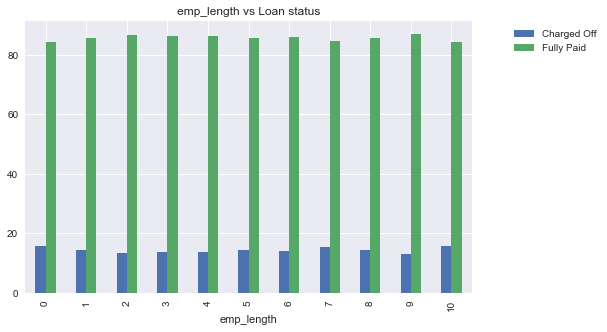

In [80]:
fig, ax = plt.subplots(figsize=(8,5))
plt.title('emp_length vs Loan status')
df_emp.reindex(["0","1","2","3","4","5","6","7","8","9","10"]).plot(ax=ax,kind='bar')
plt.legend(bbox_to_anchor=(1.3, 1.0))

There is no significant difference on the percentage of 'loan status' based on the emp_length.

To analyse on Annual income we need to create buckets or bins. Let the bins be under 10k, 10-50k, 50k-1 lac, 1-3 lacs, 3-5 lacs, 5-10 lacs, 10-20 lacs, Above 20."inc_category" is a derived metric..

In [81]:
df["inc_category"]=pd.cut(df.annual_inc,[0,100000,200000,6000000],labels=['Low', 'Medium','High'], include_lowest=True)
df.head()

,member_id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,inc_category
0,1296599,5000,36,10.65,B,B2,10,RENT,24000.0,Verified,...,5863.155187,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,Low
1,1314167,2500,60,15.27,C,C4,0,RENT,30000.0,Source Verified,...,1008.710000,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,Low
2,1313524,2400,36,15.96,C,C5,10,RENT,12252.0,Not Verified,...,3005.666844,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,Low
3,1277178,10000,36,13.49,C,C1,10,RENT,49200.0,Source Verified,...,12231.890000,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,Low
5,1311441,5000,36,7.90,A,A4,3,RENT,36000.0,Source Verified,...,5632.210000,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,Low


In [82]:
df_inc=df.groupby(['inc_category','loan_status']).count()['member_id'].unstack()
#If any of the Status not present in a particular income range, the value is taken as Nan. So 
#Impute all the Nan values with 0 to calculate the sum correctly
df_inc=df_inc.fillna(0)
df_inc

loan_status,Charged Off,Fully Paid
inc_category,,
Low,5015,28045
Medium,524,4360
High,16,169


In [83]:
sum_inc=df_inc['Charged Off']+df_inc['Fully Paid']
df_inc['Charged Off']=df_inc['Charged Off']*100/sum_inc
df_inc['Fully Paid']=df_inc['Fully Paid']*100/sum_inc
df_inc

loan_status,Charged Off,Fully Paid
inc_category,,
Low,15.169389,84.830611
Medium,10.728911,89.271089
High,8.648649,91.351351


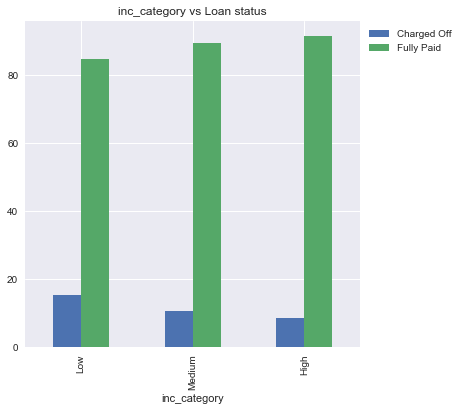

In [84]:
fig, ax = plt.subplots(figsize=(6,6))
plt.title('inc_category vs Loan status')
df_inc.plot(ax=ax,kind='bar')
plt.legend(bbox_to_anchor=(1.3, 1.0))
plt.show()

Low income range with 15% defaulters would be considered as risky and would affect the loan_status.

Let us analyse on the basis of column 'dti' which means "A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations divided by the borrower’s self-reported monthly income. First we need to group the ratios in bins/buckets. Let the buckets be [0,5,10,15,20,25,30].dti_range is a derived metric.

In [85]:
df["dti_range"]=pd.cut(df.dti,[0,5,10,15,20,25,30],labels=['5','10','15','20','25','30'], include_lowest=True)
df.head()

,member_id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,inc_category,dti_range
0,1296599,5000,36,10.65,B,B2,10,RENT,24000.0,Verified,...,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,Low,30
1,1314167,2500,60,15.27,C,C4,0,RENT,30000.0,Source Verified,...,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,Low,5
2,1313524,2400,36,15.96,C,C5,10,RENT,12252.0,Not Verified,...,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,Low,10
3,1277178,10000,36,13.49,C,C1,10,RENT,49200.0,Source Verified,...,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,Low,20
5,1311441,5000,36,7.90,A,A4,3,RENT,36000.0,Source Verified,...,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,Low,15


In [86]:
df_dti=df.groupby(['dti_range','loan_status']).count()['member_id'].unstack()
df_dti

loan_status,Charged Off,Fully Paid
dti_range,,
5,607,4304
10,990,6740
15,1388,8160
20,1375,7387
25,1108,5448
30,87,535


In [87]:
sum_dti=df_dti['Charged Off']+df_dti['Fully Paid']
df_dti['Charged Off']=df_dti['Charged Off']*100/sum_dti
df_dti['Fully Paid']=df_dti['Fully Paid']*100/sum_dti
df_dti

loan_status,Charged Off,Fully Paid
dti_range,,
5,12.360008,87.639992
10,12.807245,87.192755
15,14.537076,85.462924
20,15.692764,84.307236
25,16.900549,83.099451
30,13.987138,86.012862


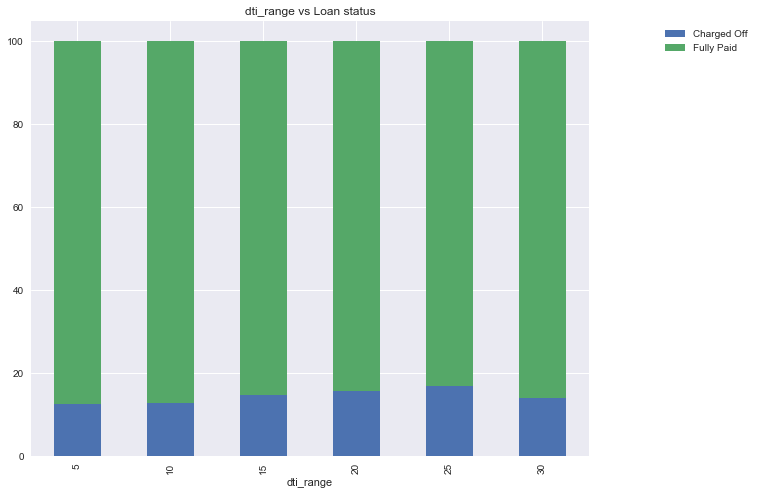

In [88]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title('dti_range vs Loan status')
df_dti.plot(ax=ax,kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1.3, 1.0))

There is so significant finding from this bar graph. The defaulter percentage increases as dti increases but it decreases between 25-30

In [89]:
df_grade=df.groupby(['grade','sub_grade','loan_status']).count()['member_id'].unstack()
#If any of the Status not present in a particular income range, the value is taken as Nan. So 
#replace all the Nan values with 0 to calculate the sum correctly
df_grade=df_grade.fillna(0)
df_grade

loan_status      Charged Off  Fully Paid
grade sub_grade                         
A     A1                  30        1102
      A2                  74        1425
      A3                 103        1696
      A4                 178        2676
      A5                 216        2478
B     B1                 170        1616
      B2                 225        1753
      B3                 335        2457
      B4                 328        2097
      B5                 356        2244
C     C1                 333        1699
      C2                 321        1593
      C3                 269        1200
      C4                 211         988
      C5                 208         931
D     D1                 167         756
      D2                 269        1000
      D3                 253         850
      D4                 214         693
      D5                 209         617
E     E1                 195         517
      E2                 160         444
      E3                 117         388
      E4                 126         293
      E5                 106         264
F     F1                  88         211
      F2                  69         162
      F3                  50         118
      F4                  51          96
      F5                  52          55
G     G1                  22          55
      G2                  22          44
      G3                  11          19
      G4                   9          24
      G5                   8          13

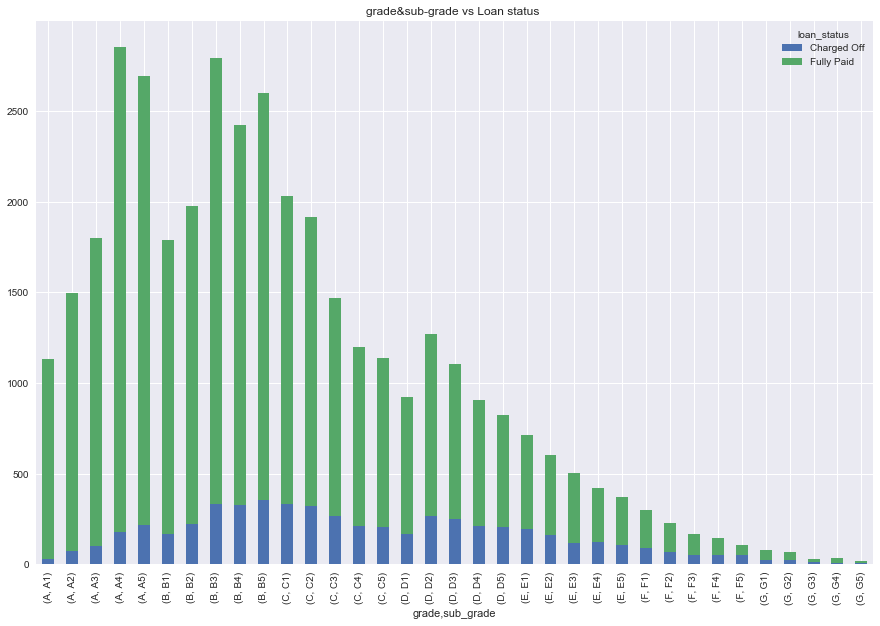

In [90]:
fig, ax = plt.subplots(figsize=(15,10))
plt.title('grade&sub-grade vs Loan status ')
df_grade.plot.bar(ax=ax,stacked=True)
plt.show()

In [91]:
sum_grade=df_grade['Charged Off']+df_grade['Fully Paid']
df_grade['Charged Off']=df_grade['Charged Off']*100/sum_grade
df_grade['Fully Paid']=df_grade['Fully Paid']*100/sum_grade
df_grade

loan_status      Charged Off  Fully Paid
grade sub_grade                         
A     A1            2.650177   97.349823
      A2            4.936624   95.063376
      A3            5.725403   94.274597
      A4            6.236861   93.763139
      A5            8.017817   91.982183
B     B1            9.518477   90.481523
      B2           11.375126   88.624874
      B3           11.998567   88.001433
      B4           13.525773   86.474227
      B5           13.692308   86.307692
C     C1           16.387795   83.612205
      C2           16.771160   83.228840
      C3           18.311777   81.688223
      C4           17.597998   82.402002
      C5           18.261633   81.738367
D     D1           18.093174   81.906826
      D2           21.197794   78.802206
      D3           22.937443   77.062557
      D4           23.594267   76.405733
      D5           25.302663   74.697337
E     E1           27.387640   72.612360
      E2           26.490066   73.509934
      E3           23.168317   76.831683
      E4           30.071599   69.928401
      E5           28.648649   71.351351
F     F1           29.431438   70.568562
      F2           29.870130   70.129870
      F3           29.761905   70.238095
      F4           34.693878   65.306122
      F5           48.598131   51.401869
G     G1           28.571429   71.428571
      G2           33.333333   66.666667
      G3           36.666667   63.333333
      G4           27.272727   72.727273
      G5           38.095238   61.904762

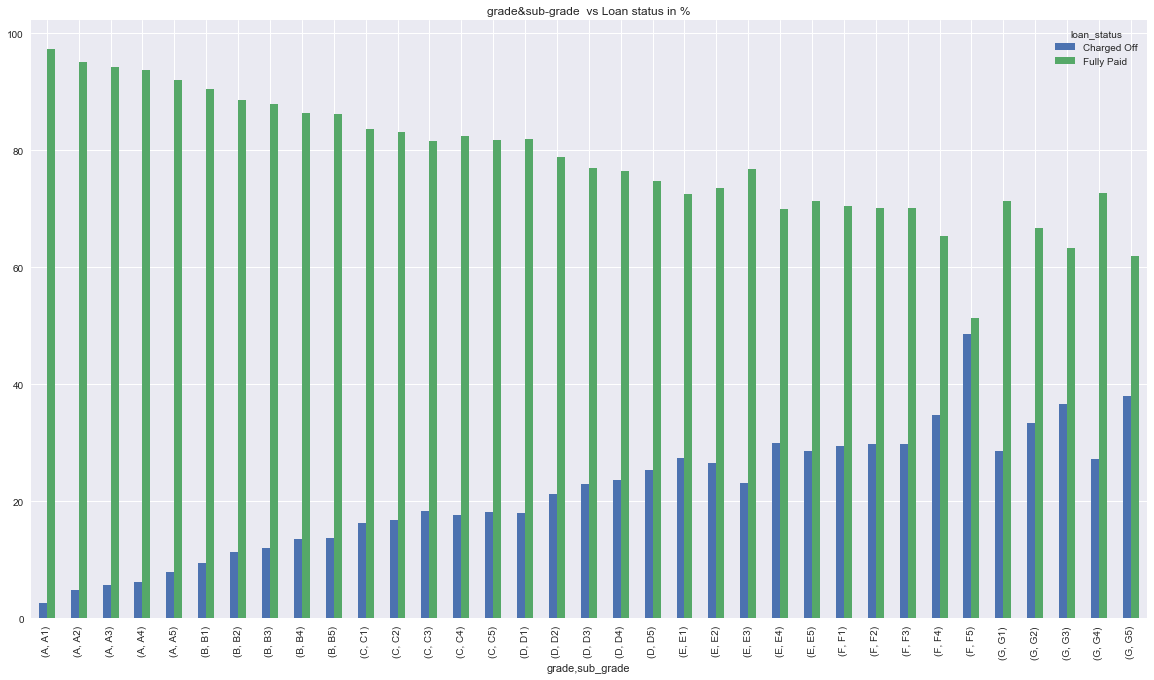

In [92]:
fig, ax = plt.subplots(figsize=(20,11))
plt.title('grade&sub-grade  vs Loan status in %')
df_grade.plot(ax=ax,kind='bar')

We can see from the plot that the  loan status has a very strong relation to the grade and subgrade. As the grade/subgrade increases the percentage of defaulters (loan status as 'Charged-off') also increases.
If an application passes the initial credit screening criteria, the characteristics of the application are assessed by Lending Club’s proprietary scoring models which can either decline or approve the applicant. The initial scoring model provides the application with a score, which when combined with the applicant’s FICO score and certain other credit attributes arrives at a Model Rank. The Model Rank is based upon an internally developed algorithm which analyzes the performance of borrower members and takes into account FICO score, credit attributes, and other application data. The Model Rank is between 1 and 25 and corresponds to a Base Risk Sub-Grade. A1 is assigned as rank 1, A2 as rank 2, till A5. B1 is assigned rank 6 and so on. 

In [93]:
df_veri=df.groupby(['verification_status','loan_status']).count()['member_id'].unstack()
df_veri

loan_status,Charged Off,Fully Paid
verification_status,,
Not Verified,2125,14472
Source Verified,1415,8126
Verified,2015,9976


In [94]:
sum_veri=df_veri['Charged Off']+df_veri['Fully Paid']
df_veri['Charged Off']=df_veri['Charged Off']*100/sum_veri
df_veri['Fully Paid']=df_veri['Fully Paid']*100/sum_veri
df_veri

loan_status,Charged Off,Fully Paid
verification_status,,
Not Verified,12.803519,87.196481
Source Verified,14.830731,85.169269
Verified,16.804270,83.195730


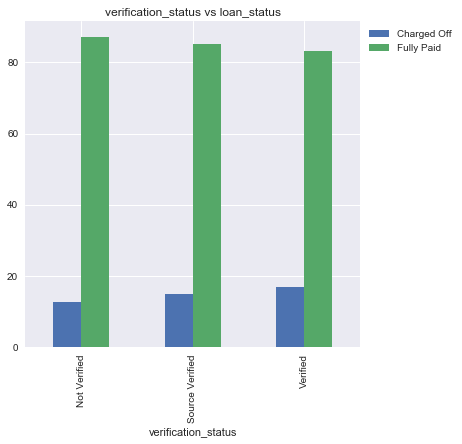

In [95]:
fig, ax = plt.subplots(figsize=(6,6))
plt.title('verification_status vs loan_status')
df_veri.plot(ax=ax,kind='bar')
plt.legend(bbox_to_anchor=(1.3, 1.0))

There is a trend that charged-off percentage in verified is highest compared to not verified and source verified. Although it is contrary to common undersatnding but is a finding and can affect the loan status.

We would need to change the data type of revol_util and also remove % before embarking upon analysis.revol_util also has null values and that can be imputed with mean value as mean and median are very close.Created a new derived metric as revol_range.

In [96]:
df['revol_util'] =df['revol_util'].apply(lambda x: str(x).rstrip('%'))
df['revol_util']=df['revol_util'].astype(float)

In [97]:
df['revol_util'].mean()

48.633576155462194

In [98]:
df['revol_util'].median()

49.0

In [99]:
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].median())

In [100]:
df['revol_util'].isnull().sum()

0

In [101]:
df["revol_range"]=pd.cut(df.revol_util,[0,10,20,30,40,50,60,70,80,90,100],\
                        labels=['10','20','30','40','50','60','70','80','90','100'], include_lowest=True)

In [102]:
df_revol=df.groupby(['revol_range','loan_status']).count()['member_id'].unstack()

In [103]:
df_revol

loan_status,Charged Off,Fully Paid
revol_range,,
10,431,3951
20,329,2959
30,413,3257
40,499,3469
50,615,3617
60,624,3522
70,652,3427
80,691,3173
90,668,2843


In [104]:
sum_revol=df_revol['Charged Off']+df_revol['Fully Paid']
df_revol['Charged Off']=df_revol['Charged Off']*100/sum_revol
df_revol['Fully Paid']=df_revol['Fully Paid']*100/sum_revol
df_revol

loan_status,Charged Off,Fully Paid
revol_range,,
10,9.835691,90.164309
20,10.006083,89.993917
30,11.253406,88.746594
40,12.575605,87.424395
50,14.532136,85.467864
60,15.050651,84.949349
70,15.984310,84.015690
80,17.883023,82.116977
90,19.025919,80.974081


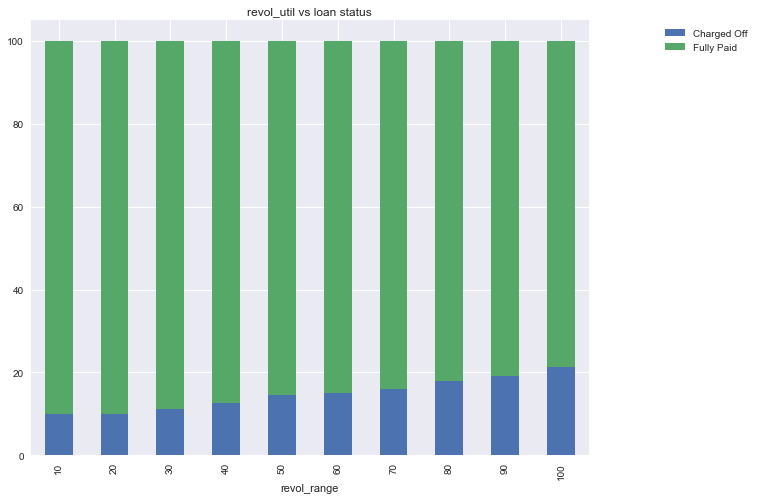

In [105]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title('revol_util vs loan status')
df_revol.plot(ax=ax,kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1.3, 1.0))


As the revol_util increases, the percentage of loan defaulters also increases and this can affect the loan status.

In [106]:
df_deli=df.groupby(['delinq_2yrs','loan_status']).count()['member_id'].unstack()
df_deli=df_deli.fillna(0)
df_deli

loan_status,Charged Off,Fully Paid
delinq_2yrs,,
0,4876.0,29144.0
1,498.0,2652.0
2,127.0,527.0
3,35.0,173.0
4,13.0,45.0
5,3.0,18.0
6,1.0,9.0
7,1.0,3.0
8,1.0,1.0


In [107]:
sum_deli=df_deli['Charged Off']+df_deli['Fully Paid']
df_deli['Charged Off']=df_deli['Charged Off']*100/sum_deli
df_deli['Fully Paid']=df_deli['Fully Paid']*100/sum_deli
df_deli

loan_status,Charged Off,Fully Paid
delinq_2yrs,,
0,14.332745,85.667255
1,15.809524,84.190476
2,19.418960,80.581040
3,16.826923,83.173077
4,22.413793,77.586207
5,14.285714,85.714286
6,10.000000,90.000000
7,25.000000,75.000000
8,50.000000,50.000000


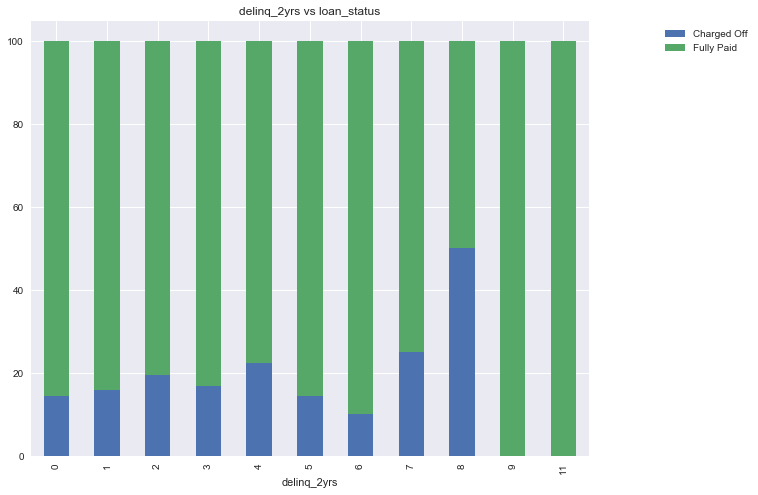

In [108]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title('delinq_2yrs vs loan_status')
df_deli.plot(ax=ax,kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1.3, 1.0))

If the member has 8 number of 30+ days past-due incidences of delinquency in past 2 years then the member is most likely to default, about 50% chance.

In order to do the analysis on loan_amnt we have to create bins.For creating bins, a histogram is created to undestand the loan_amnt distribution.

In [109]:
df.loan_amnt.max()

35000

In [110]:
df.loan_amnt.min()

500

C:\Users\Girish S\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


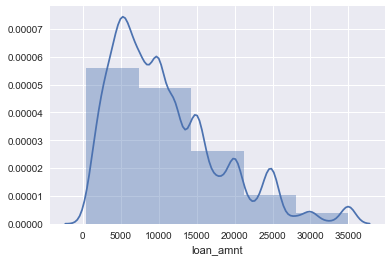

In [111]:
sns.distplot(df.loan_amnt,5)

Based on the above histogram we can create a derived metric called loan_amnt_range with difference of 7000 as per the loan_amnt concentration.

In [112]:
df["loan_amnt_range"]=pd.cut(df.loan_amnt,[0,7000,14000,21000,28000,35000],labels=['7000','14000','21000','28000','35000'], include_lowest=True)

In [113]:
df_loan_amnt=df.groupby(['loan_amnt_range','loan_status']).count()['member_id'].unstack()
df_loan_amnt

loan_status,Charged Off,Fully Paid
loan_amnt_range,,
7000,1880,12371
14000,1774,11431
21000,1138,5810
28000,521,2167
35000,242,795


In [114]:
sum_loan_amnt=df_loan_amnt['Charged Off']+df_loan_amnt['Fully Paid']
df_loan_amnt['Charged Off']=df_loan_amnt['Charged Off']*100/sum_loan_amnt
df_loan_amnt['Fully Paid']=df_loan_amnt['Fully Paid']*100/sum_loan_amnt
df_loan_amnt

loan_status,Charged Off,Fully Paid
loan_amnt_range,,
7000,13.192057,86.807943
14000,13.434305,86.565695
21000,16.378814,83.621186
28000,19.382440,80.617560
35000,23.336548,76.663452


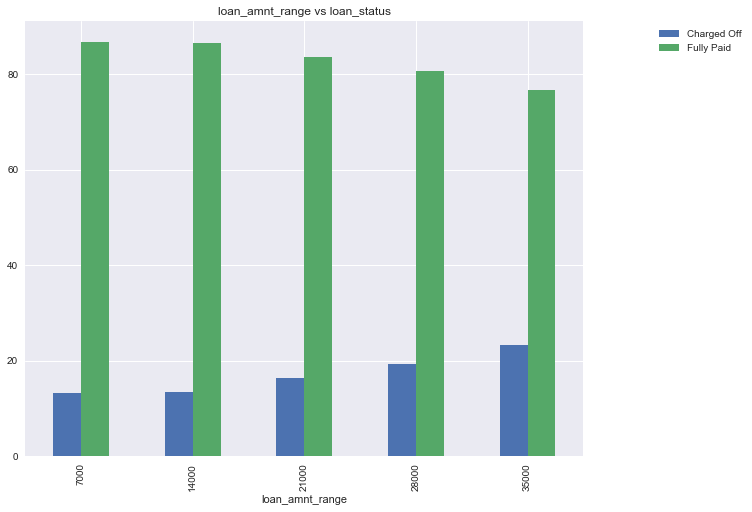

In [115]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title('loan_amnt_range vs loan_status')
df_loan_amnt.plot(ax=ax,kind='bar')
plt.legend(bbox_to_anchor=(1.3, 1.0))

Loan amount shows a clear impact on loan status where the defaulters percentage is increasing with the loan amount.Members in 28000 to 35000 are most likely to default.

In [116]:
df_term=df.groupby(['term','loan_status']).count()['member_id'].unstack()
df_term=df_term.fillna(0)
df_term

loan_status,Charged Off,Fully Paid
term,,
36,3201,25618
60,2354,6956


In [117]:
sum_term=df_term['Charged Off'] + df_term['Fully Paid']
df_term['Charged Off']=df_term['Charged Off']*100/sum_term
df_term['Fully Paid']=df_term['Fully Paid']*100/sum_term
df_term

loan_status,Charged Off,Fully Paid
term,,
36,11.107256,88.892744
60,25.284640,74.715360


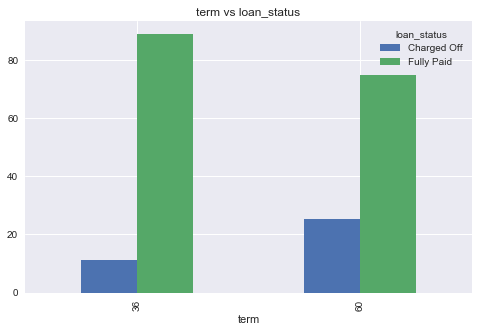

In [118]:
fig, ax = plt.subplots(figsize=(8,5))
plt.title('term vs loan_status')
df_term.plot(ax=ax,kind='bar')

Term shows clear impact on loan status as it increases with the loan term.Loans with 60 months term are most likely to default.

In [119]:
df_pub_rec=df.groupby(['pub_rec','loan_status']).count()['member_id'].unstack()
df_pub_rec=df_pub_rec.fillna(0)
df_pub_rec

loan_status,Charged Off,Fully Paid
pub_rec,,
0,5096.0,30977.0
1,449.0,1551.0
2,10.0,37.0
3,0.0,7.0
4,0.0,2.0


In [120]:
sum_df_pub_rec=df_pub_rec['Charged Off'] + df_pub_rec['Fully Paid']
df_pub_rec['Charged Off']=df_pub_rec['Charged Off']*100/sum_df_pub_rec
df_pub_rec['Fully Paid']=df_pub_rec['Fully Paid']*100/sum_df_pub_rec
df_pub_rec

loan_status,Charged Off,Fully Paid
pub_rec,,
0,14.126909,85.873091
1,22.450000,77.550000
2,21.276596,78.723404
3,0.000000,100.000000
4,0.000000,100.000000


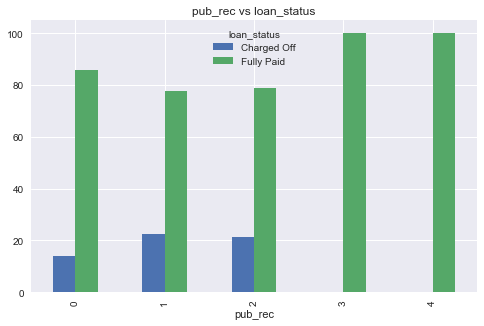

In [121]:
fig, ax = plt.subplots(figsize=(8,5))
plt.title('pub_rec vs loan_status')
df_pub_rec.plot(ax=ax,kind='bar')

Derogatory public records or pub_rec doesn't shows consistent relation with loan status and can be ignored.However 1 and 2 oublic records have higher percentage of defaulters.

In [122]:
df_pub_rec_bankruptcies=df.groupby(['pub_rec_bankruptcies','loan_status']).count()['member_id'].unstack()
df_pub_rec_bankruptcies=df_pub_rec_bankruptcies.fillna(0)
df_pub_rec_bankruptcies

loan_status,Charged Off,Fully Paid
pub_rec_bankruptcies,,
0.0,5075,30731
1.0,362,1268
2.0,2,3


In [123]:
sum_pub_rec_bankruptcies=df_pub_rec_bankruptcies['Charged Off'] + df_pub_rec_bankruptcies['Fully Paid']
df_pub_rec_bankruptcies['Charged Off']=df_pub_rec_bankruptcies['Charged Off']*100/sum_pub_rec_bankruptcies
df_pub_rec_bankruptcies['Fully Paid']=df_pub_rec_bankruptcies['Fully Paid']*100/sum_pub_rec_bankruptcies
df_pub_rec_bankruptcies

loan_status,Charged Off,Fully Paid
pub_rec_bankruptcies,,
0.0,14.173602,85.826398
1.0,22.208589,77.791411
2.0,40.000000,60.000000


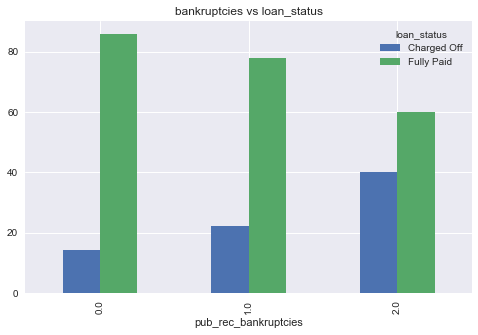

In [124]:
fig, ax = plt.subplots(figsize=(8,5))
plt.title('bankruptcies vs loan_status')
df_pub_rec_bankruptcies.plot(ax=ax,kind='bar')

Increase in Public record of bankruptcies(pub_rec_bankruptcies) causes an increase in default loan status and can be considered.

In [125]:
df_purpose=df.groupby(['purpose','loan_status']).count()['member_id'].unstack()
df_purpose=df_purpose.fillna(0)
df_purpose

loan_status,Charged Off,Fully Paid
purpose,,
car,159,1332
credit_card,535,4445
debt_consolidation,2733,15141
educational,55,268
home_improvement,337,2458
house,57,299
major_purchase,220,1908
medical,106,568
moving,91,479


In [126]:
sum_purpose=df_purpose['Charged Off']+df_purpose['Fully Paid']
df_purpose['Charged Off']=df_purpose['Charged Off']*100/sum_purpose
df_purpose['Fully Paid']=df_purpose['Fully Paid']*100/sum_purpose
df_purpose

loan_status,Charged Off,Fully Paid
purpose,,
car,10.663984,89.336016
credit_card,10.742972,89.257028
debt_consolidation,15.290366,84.709634
educational,17.027864,82.972136
home_improvement,12.057245,87.942755
house,16.011236,83.988764
major_purchase,10.338346,89.661654
medical,15.727003,84.272997
moving,15.964912,84.035088


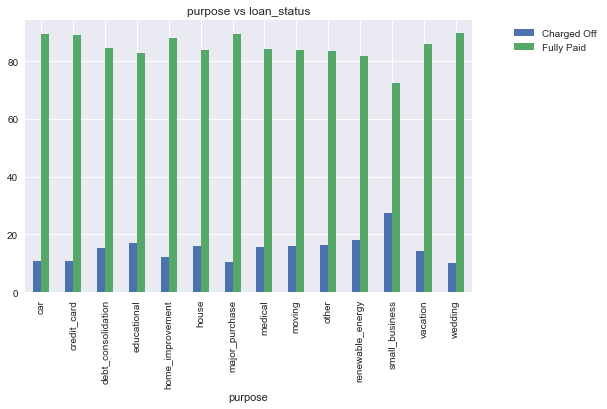

In [127]:
fig, ax = plt.subplots(figsize=(8,5))
plt.title('purpose vs loan_status')
df_purpose.plot(ax=ax,kind='bar')
plt.legend(bbox_to_anchor=(1.3, 1.0))

For small business, the percentage of defaulters are maximum (>20%). Renewable_energy and educational loans are also fairly risky

For interest rate, we need a derived metric int_cat as it would give us a better picture.

In [128]:
df["int_cat"]=pd.cut(df.int_rate,[0,9,13,17,21,26],labels=['0-9','9-13','13-17','17-21','21-26'], include_lowest=True)
df_int=df.groupby(['int_cat','loan_status']).count()['member_id'].unstack()
df_int

sum_int=df_int['Charged Off']+df_int['Fully Paid']
df_int['Charged Off']=df_int['Charged Off']*100/sum_int
df_int['Fully Paid']=df_int['Fully Paid']*100/sum_int
df_int



loan_status,Charged Off,Fully Paid
int_cat,,
0-9,5.984397,94.015603
9-13,12.948618,87.051382
13-17,19.212772,80.787228
17-21,29.825674,70.174326
21-26,43.893130,56.106870


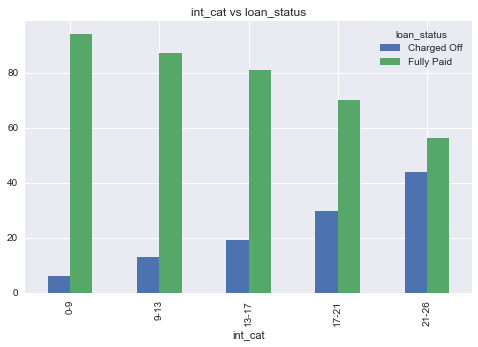

In [129]:
fig, ax = plt.subplots(figsize=(8,5))
plt.title('int_cat vs loan_status')
df_int.plot(ax=ax,kind='bar')

From  the bar plot, we can see that the as the interest rates are increasing , the percentage of defaulters are also increasing.

We also did some more analysis to understand the distribution grade,verification_status and loan_status with respect to int_rate.

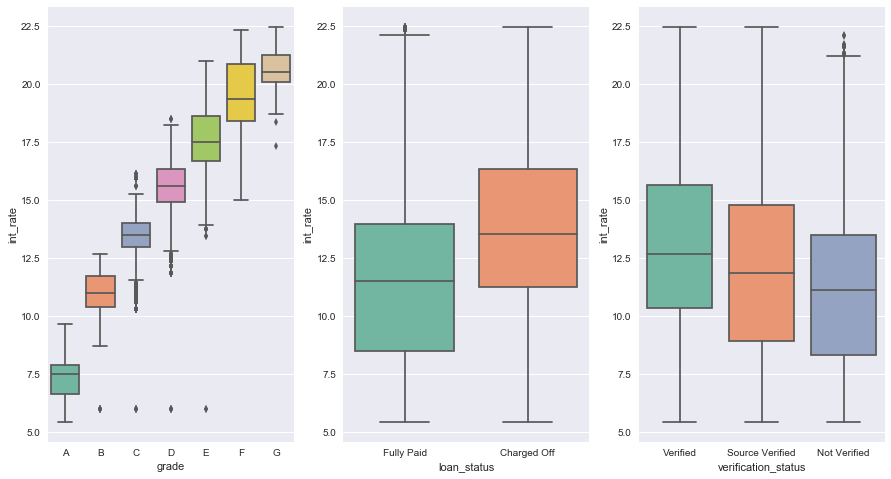

In [130]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,8))
sns.boxplot(x="grade", y="int_rate", data=df, palette="Set2", ax=ax1, order=["A","B","C","D","E","F","G"])
sns.boxplot(x="loan_status", y="int_rate", data=df, palette="Set2", ax=ax2)
sns.boxplot(x="verification_status", y="int_rate", data=df, palette="Set2", ax=ax3)



For Fully paid the Inter Quartile Range lies between interest rates 8-14% whereas for Charged off the IQR lies between 12-17%
Large no. of outliers in "Not verified".